<a href="https://colab.research.google.com/github/PrachiHarish/ML-Projects/blob/main/Copy_of_Logistic_Regression_(Diabetics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/diabetes.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df = data.drop(['Pregnancies','Outcome'], axis = 1)

In [ ]:
diabetes_df.replace(0,np.nan,inplace=True)

In [ ]:
diabetes_df.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
np.round(diabetes_df['Insulin'].mean())

156.0

In [ ]:
diabetes_df['Insulin'].replace(np.nan,np.round(diabetes_df['Insulin'].mean()),inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
#S strategy=mean,median,most_frequent
imputer=SimpleImputer(strategy="median")

In [ ]:
x_data=imputer.fit_transform(diabetes_df)
x_data

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
diabetes_df2=pd.DataFrame(x_data,columns=diabetes_df.columns)
diabetes_df2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,122.0,70.0,27.0,156.0,36.8,0.340,27.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,126.0,60.0,29.0,156.0,30.1,0.349,47.0


In [ ]:
diabetes_df2["Pregnancies"]=data.Pregnancies
diabetes_df2["Outcome"]=data.Outcome

<Axes: xlabel='Outcome', ylabel='count'>

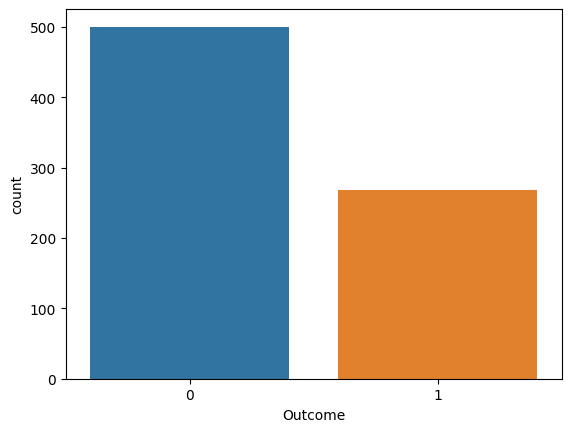

In [ ]:
sns.countplot(x="Outcome",data=diabetes_df2)

In [ ]:
diabetes_df2["Outcome"].value_counts()/diabetes_df.shape[0]

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [ ]:
df_0=diabetes_df2[diabetes_df2["Outcome"]==0]
df_1=diabetes_df2[diabetes_df2["Outcome"]==1]
print(df_0.shape)
print(df_1.shape)

(500, 9)
(268, 9)


In [ ]:
from sklearn.utils import resample
df_1_upsample=resample(df_1,n_samples=df_0.shape[0],replace=True,random_state=123)

In [ ]:
diabetes_df3=pd.concat([df_0,df_1_upsample])

In [ ]:
x=diabetes_df3.drop(["Outcome"],axis=1)
y=diabetes_df3["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver="liblinear",max_iter=100000,C=10,penalty="l2")

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(C=10, max_iter=100000, solver='liblinear')

In [ ]:
model.score(x_test,y_test)

0.805

In [ ]:
yhat=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,yhat)
print(cm)

[[79 22]
 [17 82]]


<Axes: >

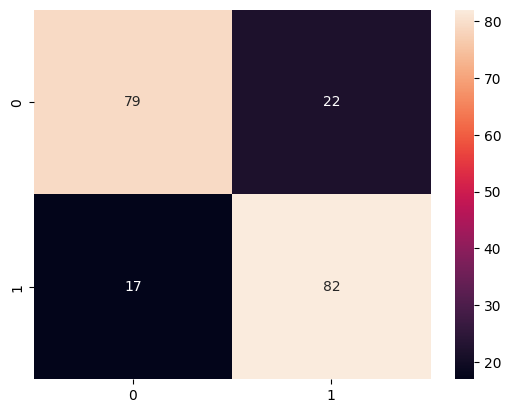

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       101
           1       0.79      0.83      0.81        99

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



In [ ]:
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1
5,116.0,74.0,29.0,156.0,25.6,0.201,30.0,5
7,115.0,72.0,29.0,156.0,35.3,0.134,29.0,10
10,110.0,92.0,29.0,156.0,37.6,0.191,30.0,4
...,...,...,...,...,...,...,...,...
429,95.0,82.0,25.0,180.0,35.0,0.233,43.0,1
701,125.0,78.0,31.0,156.0,27.6,0.565,49.0,6
476,105.0,80.0,45.0,191.0,33.7,0.711,29.0,2
579,197.0,70.0,99.0,156.0,34.7,0.575,62.0,2


In [ ]:
x_new=[[85.0,	66.0,	29.0,	156.0,	26.6,	0.351,	31.0,	1]]
model.predict(x_new)

array([0])

In [ ]:
y

1      0
3      0
5      0
7      0
10     0
      ..
429    1
701    1
476    1
579    1
110    1
Name: Outcome, Length: 1000, dtype: int64

In [ ]:
model.coef_

array([[ 3.63186024e-02, -2.06397953e-02,  7.78785722e-03,
        -5.17744751e-04,  1.08197287e-01,  1.06964898e+00,
         7.72343717e-03,  1.35396832e-01]])